# Linear Regression Project

**Goals**: Analyzing the customer data to decide whether to focus efforts on the mobile app experience or the website.

In [79]:
import pandas as pd
import numpy as np

In [80]:
import matplotlib.pyplot as plt
import seaborn as sns

In [81]:
%matplotlib inline
sns.set_style('whitegrid')

In [83]:
customers = pd.read_csv('../datasets/Ecommerce Customers') # getting the data

In [84]:
customers.head() # taking a glimpse at the data

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [86]:
customers.describe() # some stats

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [87]:
customers.info() # information about the dataset itself

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
Email                   500 non-null object
Address                 500 non-null object
Avatar                  500 non-null object
Avg. Session Length     500 non-null float64
Time on App             500 non-null float64
Time on Website         500 non-null float64
Length of Membership    500 non-null float64
Yearly Amount Spent     500 non-null float64
dtypes: float64(5), object(3)
memory usage: 25.4+ KB


## Exploration
#### Comparing the Time on Website and Yearly Amount Spent columns

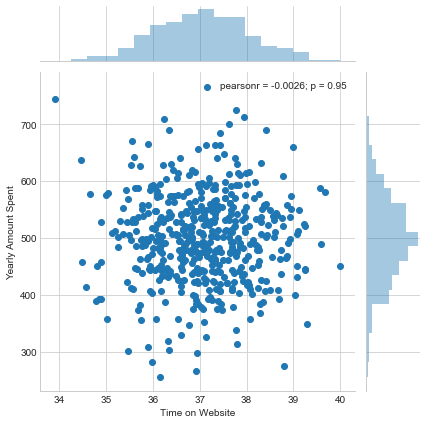

In [88]:
sns.jointplot(data=customers, 
              x= 'Time on Website', 
              y= 'Yearly Amount Spent')

#### Comparing the Time on App and Yearly Amount Spent columns

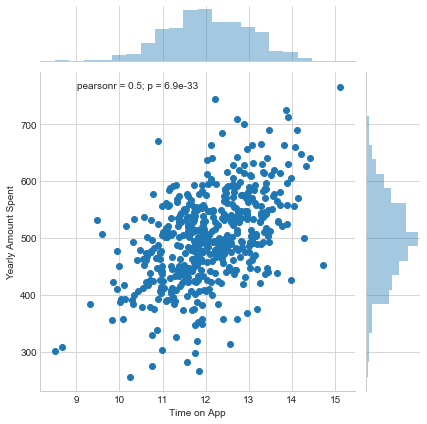

In [89]:
sns.jointplot(data=customers, 
              x= 'Time on App', 
              y= 'Yearly Amount Spent')

#### Comparing Time on App and Length of Membership

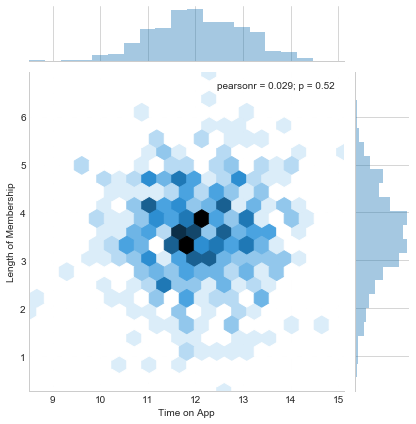

In [90]:
sns.jointplot(x='Time on App', 
              y= 'Length of Membership', 
              data=customers, 
              kind='hex')

### Exploring these types of relationships across the entire dataset

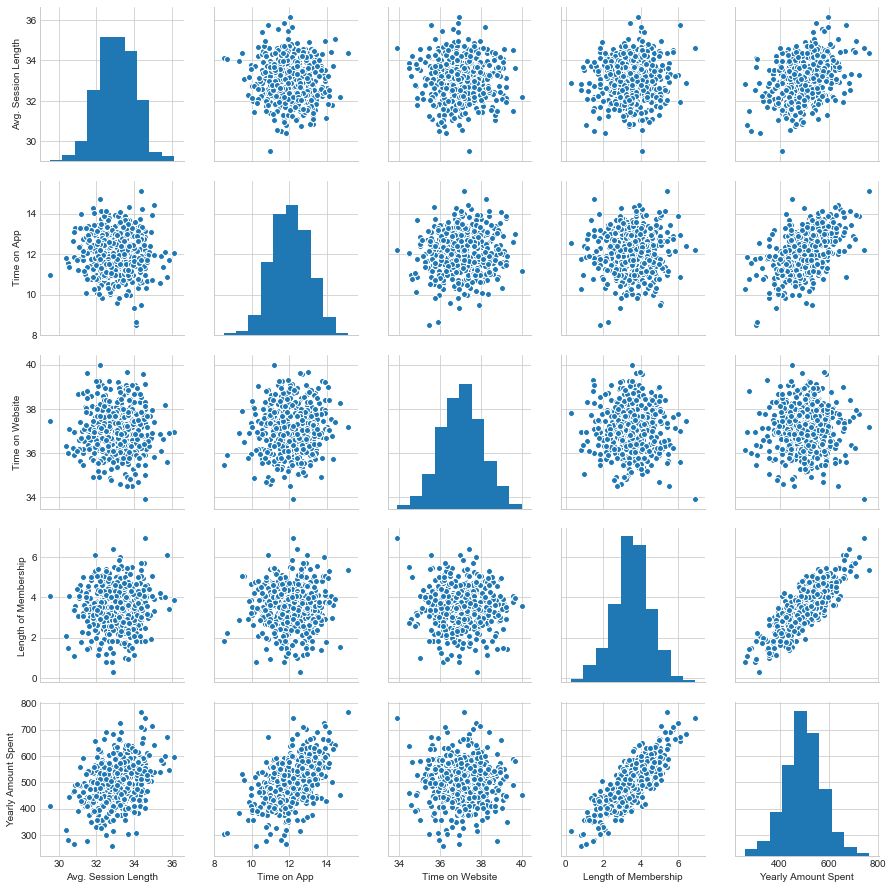

In [23]:
sns.pairplot(customers)

## Based off the above pairplot 'Length of Membership' looks to be the most correlated feature with 'Yearly Amount Spent'.

#### Let's create a Linear Model Plot of those two parameters

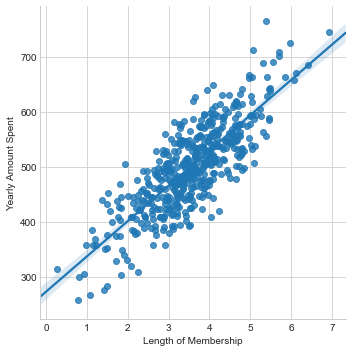

In [24]:
sns.lmplot(data=customers, x= "Length of Membership", y= "Yearly Amount Spent")

# Training and Testing
Setting variable X equal to the *numerical features* of the customers dataset and a variable y equal to the *'Yearly Amount Spent'* column

In [91]:
customers.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

In [92]:
y = customers['Yearly Amount Spent']

In [93]:
X = customers[['Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership']]

### Splitting the Data into Training and Testing data
We'll set the `test_size=0.3` and `random_state=101`

In [94]:
from sklearn.model_selection import train_test_split

In [95]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

### Training the Model

In [96]:
from sklearn.linear_model import LinearRegression # importing

In [97]:
lm = LinearRegression() # creating an instance

In [98]:
lm.fit(X_train,y_train) # Fit/train lm on the training data

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

### Predicting from the Test Data

In [99]:
predictions=lm.predict(X_test)

Now, plotting the real values versus the predicted values

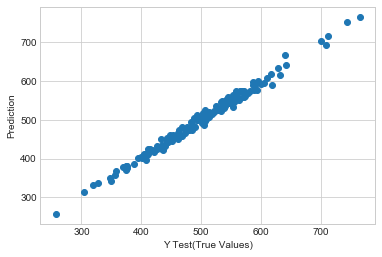

In [100]:
plt.scatter(y_test,predictions)
plt.xlabel('Y Test(True Values)')
plt.ylabel('Prediction')

# Evaluating the Model
- Mean Absolute Error (MAE)
- Mean Squared Error (MSE)
- Root Mean Squared Error (RMSE)
- Explained Variance Score (EVS)

In [101]:
from sklearn import metrics

In [102]:
print('MAE',metrics.mean_absolute_error(y_test,predictions))
print('MSE',metrics.mean_squared_error(y_test,predictions))
print('RMSE',np.sqrt(metrics.mean_squared_error(y_test,predictions)))

MAE 7.22814865343
MSE 79.813051651
RMSE 8.93381506698


In [103]:
metrics.explained_variance_score(y_test,predictions)

0.98907712318896068

### Residuals
Plotting a Histogram to make sure everything is normally distributed

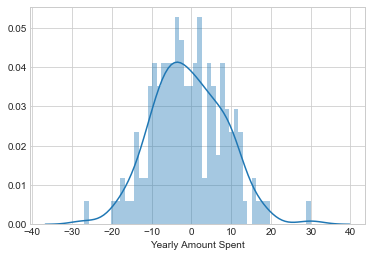

In [104]:
sns.distplot(y_test - predictions,bins=50)

### Interpreting the Coefficients

In [105]:
lm.coef_ # the coefficients of the model

array([ 25.98154972,  38.59015875,   0.19040528,  61.27909654])

In [106]:
cdf=pd.DataFrame(lm.coef_, X.columns,columns=['Coefficients'])
cdf

,Coefficients
Avg. Session Length,25.981550
Time on App,38.590159
Time on Website,0.190405
Length of Membership,61.279097


# Seems like 'Time on App' and 'Length of Membership' are the most important factors in deciding the 'Yearly amount spent'. 